<h1><center>Build <a href="https://howsmynhs.co.uk/">HowsMyNHS</a> website</center></h1>

This is the main script used to automatically generate the html for <a href="https://howsmynhs.co.uk/">HowsMyNHS</a>.

In [1]:
import build_website.build_website as bw
import build_website.plot_data as pd

waiting_data = '../NHSData/AnE_Data/NHSwaiting.npy'
bed_data = '../NHSData/Bed_Data/NHSbeds.npy'
covid_data = '../NHSData/Covid-19/covid_deaths.npy'
news_file = './data/NHS_news_items.ods'

SyntaxError: positional argument follows keyword argument (plot_data.py, line 545)

<h2>Generate Plots</h2>

Generating Covid-19 graphs... 

ValueError: x and y must have same first dimension, but have shapes (255,) and (259, 1)

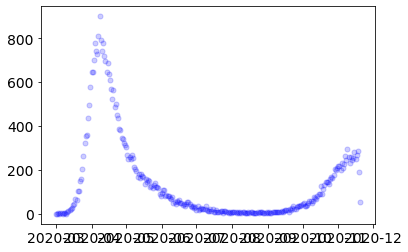

In [2]:
#pd.plotWaitingData(waiting_data)
#pd.plotBedData(bed_data)
#pd.plotOGimages(waiting_data, bed_data)
pd.plotCovidData(covid_data)

<h2>Make homepage</h2>

In [3]:
bw.MakeHomepage(waiting_data, bed_data)

Building homepage... Done


<h2>Make all the other pages</h2>

In [4]:
bw.build_trust_pages(waiting_data, bed_data, news_file)

Building trust pages... Done.
